In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
#Reading the file
df = pd.read_csv (r"tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# Missing values for each column
missing = df.isnull().sum()
non_null = df.notnull().sum()
total = len(df)

# Build summary DataFrame
summary = pd.DataFrame({
    "Non-Null Count": non_null,
    "Missing Values": missing,
    "Missing %": (missing / total * 100).round(1),
    "Dtype": df.dtypes
})

# Rename index to 'Column'
summary.index.name = "Column"

# Display
summary

,Non-Null Count,Missing Values,Missing %,Dtype
Column,,,,
PassengerId,418,0,0.0,int64
Survived,418,0,0.0,int64
Pclass,418,0,0.0,int64
Name,418,0,0.0,object
Sex,418,0,0.0,object
Age,332,86,20.6,float64
SibSp,418,0,0.0,int64
Parch,418,0,0.0,int64
Ticket,418,0,0.0,object


In [6]:
# Make a copy to avoid Error (SettingWithCopyWarning) if modifying df later
df_processed = df.copy()

In [7]:
df_processed.describe()

Column,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#Impute the missing values with median - Impute used due to its robustness
imputer_age = SimpleImputer(strategy='median')
df_processed['Age'] = imputer_age.fit_transform(df_processed[['Age']])
imputer_fare = SimpleImputer(strategy='median')
df_processed['Fare'] = imputer_fare.fit_transform(df_processed[['Fare']])

In [9]:
#Dropping the column Cabin that has values less than half
df_processed = df_processed.drop('Cabin', axis=1)

In [10]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [11]:
# Drop irrelevant columns: PassengerId, Name and Ticket
df_processed = df_processed.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [12]:
# Remaining Columns
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [13]:
# Encoding Categorical Features
# 'Sex': Use LabelEncoder (binary feature)
le = LabelEncoder()
df_processed['Sex'] = le.fit_transform(df_processed['Sex']) # male=1, female=0. Or male=0, female=1 depending on internal sorting.

# 'Embarked': Use OneHotEncoder
print("Unique Embarked values before OneHotEncoding:", df_processed['Embarked'].unique())
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
embarked_encoded = ohe.fit_transform(df_processed[['Embarked']])
embarked_df = pd.DataFrame(embarked_encoded, columns=ohe.get_feature_names_out(['Embarked']), index=df_processed.index)
df_processed = pd.concat([df_processed.drop('Embarked', axis=1), embarked_df], axis=1)

print("DataFrame after preprocessing. First 5 rows:")
print(df_processed.head())
print("\n")
print("DataFrame Info after preprocessing:")
df_processed.info()
print("\n")

Unique Embarked values before OneHotEncoding: ['Q' 'S' 'C']
DataFrame after preprocessing. First 5 rows:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  34.5      0      0   7.8292         0.0         1.0   
1         1       3    0  47.0      1      0   7.0000         0.0         0.0   
2         0       2    1  62.0      0      0   9.6875         0.0         1.0   
3         0       3    1  27.0      0      0   8.6625         0.0         0.0   
4         1       3    0  22.0      1      1  12.2875         0.0         0.0   

   Embarked_S  
0         0.0  
1         1.0  
2         0.0  
3         1.0  
4         1.0  


DataFrame Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   

In [14]:
#Splitting the data
print("Splitting Data into Training and Test Sets")
X = df_processed.drop('Survived', axis=1) # Features
y = df_processed['Survived']             # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n")

Splitting Data into Training and Test Sets
X_train shape: (334, 9)
X_test shape: (84, 9)
y_train shape: (334,)
y_test shape: (84,)




In [15]:
#Saving the files
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [16]:
# Scaling Numerical Features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled (first 5 rows):")
print(X_train_scaled[:5])
print("\n")
print("X_test_scaled (first 5 rows):")
print(X_test_scaled[:5])
print("\n")

X_train_scaled (first 5 rows):
[[ 0.85435834  0.75370758 -0.21477642 -0.48043064 -0.41184087 -0.50912957
  -0.54736724 -0.33665016  0.70551956]
 [ 0.85435834  0.75370758 -0.68236136 -0.48043064 -0.41184087 -0.49535877
  -0.54736724 -0.33665016  0.70551956]
 [ 0.85435834  0.75370758 -0.21477642 -0.48043064 -0.41184087 -0.49615131
  -0.54736724  2.97044263 -1.41739515]
 [ 0.85435834  0.75370758 -1.61753124 -0.48043064  0.6712682  -0.57539142
  -0.54736724 -0.33665016  0.70551956]
 [ 0.85435834 -1.3267745  -0.21477642 -0.48043064 -0.41184087 -0.49564602
  -0.54736724  2.97044263 -1.41739515]]


X_test_scaled (first 5 rows):
[[ 0.85435834 -1.3267745  -0.21477642 -0.48043064 -0.41184087 -0.49615131
  -0.54736724  2.97044263 -1.41739515]
 [-1.49424813 -1.3267745  -0.37063806  0.61116007 -0.41184087  0.32912293
   1.82692702 -0.33665016 -1.41739515]
 [ 0.85435834  0.75370758 -0.21477642 -0.48043064 -0.41184087 -0.49362833
  -0.54736724 -0.33665016  0.70551956]
 [-0.31994489 -1.3267745  -0.760

Choosing and training the Model
 - Logistic Regression
 - Random Forest Classifier

In [17]:
#Logistic Regression Model
print("Training Logistic Regression Model...")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_scaled, y_train)
print("Logistic Regression Model Trained.\n")

Training Logistic Regression Model...
Logistic Regression Model Trained.



In [18]:
# Random Forest Classifier
print("Training Random Forest Classifier Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Random Forest is less sensitive to feature scaling, so we can use unscaled X
rf_model.fit(X_train, y_train)
print("Random Forest Classifier Model Trained.\n")

Training Random Forest Classifier Model...


Random Forest Classifier Model Trained.



Evaluating the Models

In [19]:
# Evaluate Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\n")

Logistic Regression Accuracy: 1.0000
Logistic Regression Confusion Matrix:
[[53  0]
 [ 0 31]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84





In [20]:
# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\n")

Random Forest Accuracy: 1.0000
Random Forest Confusion Matrix:
[[53  0]
 [ 0 31]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84





Making predictions using sample data
- Using hypothetical new passenger
- The passenger data will be procced through the same steps
    - Removing irrelevant columns
    - Impute missing values if any.
    - Encode categorical features using the *fitted* encoders
    - Ensuring column order matches training data for X_train -This is crucial (Create a DataFrame with the same columns as X_train, then fill it)
    - Prediction using logistic regression and random forest
    - Visualizing key relationships

In [21]:
# Capturing the data
new_passenger_features_raw = pd.DataFrame({
    'Pclass': [1],
    'Name': ['New, Mrs. Example (Test User)'], # Name added for consistency, but will be dropped
    'Sex': ['female'],
    'Age': [30],
    'SibSp': [0],
    'Parch': [0],
    'Ticket': ['TEST12345'], # Ticket added for consistency, but will be dropped
    'Fare': [50],
    'Cabin': [None], # Cabin added for consistency, but will be dropped
    'Embarked': ['S']
})

In [22]:
# Dropping irrelevant columns
new_passenger_processed = new_passenger_features_raw.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')


In [23]:
#Imputing missing values (if any, using the *fitted* imputers from training data)
new_passenger_processed['Age'] = imputer_age.transform(new_passenger_processed[['Age']])
new_passenger_processed['Fare'] = imputer_fare.transform(new_passenger_processed[['Fare']])

In [24]:
#Encoding categorical features using the *fitted* encoders
new_passenger_processed['Sex'] = le.transform(new_passenger_processed['Sex'])
embarked_new = ohe.transform(new_passenger_processed[['Embarked']])
embarked_new_df = pd.DataFrame(embarked_new, columns=ohe.get_feature_names_out(['Embarked']))
new_passenger_processed = pd.concat([new_passenger_processed.drop('Embarked', axis=1), embarked_new_df], axis=1)

In [25]:
# Ensure column order matches training data for X_train - Fill any columns not present in new_passenger_processed with 0
new_passenger_final = pd.DataFrame(columns=X.columns)
new_passenger_final = pd.concat([new_passenger_final, new_passenger_processed], ignore_index=True)
new_passenger_final = new_passenger_final.fillna(0) 


In [26]:
# Prediction with Logistic Regression using scaled data
new_passenger_scaled = scaler.transform(new_passenger_final)
log_reg_prediction = log_reg_model.predict(new_passenger_scaled)
print(f"Logistic Regression predicts survival for new passenger: {'Survived' if log_reg_prediction[0] == 1 else 'Not Survived'}")

Logistic Regression predicts survival for new passenger: Survived


In [27]:
# Prediction with Random Forest using unscaled data
rf_prediction = rf_model.predict(new_passenger_final)
print(f"Random Forest predicts survival for new passenger: {'Survived' if rf_prediction[0] == 1 else 'Not Survived'}")

Random Forest predicts survival for new passenger: Survived


Testing the Model on Multiple Hypothetical Data

In [28]:

#Capture multiple passengers' data
new_passengers_features_raw = pd.DataFrame({
    'Pclass': [1, 2, 3],
    'Name': [
        'New, Mrs. Example (Test User 1)',
        'New, Mr. Sample (Test User 2)',
        'New, Miss Demo (Test User 3)'
    ],
    'Sex': ['female', 'male', 'female'],
    'Age': [30, None, 22],        # Example: missing Age for passenger 2
    'SibSp': [0, 1, 0],
    'Parch': [0, 0, 1],
    'Ticket': ['TEST12345', 'TEST12346', 'TEST12347'],
    'Fare': [50, None, 15],       # Example: missing Fare for passenger 2
    'Cabin': [None, None, None],
    'Embarked': ['S', 'C', 'Q']
})

In [29]:
#Drop irrelevant columns
new_passengers_processed = new_passengers_features_raw.drop(
    ['PassengerId', 'Name', 'Ticket', 'Cabin'],
    axis=1,
    errors='ignore'
)

In [30]:
#Impute missing values using fitted imputers
new_passengers_processed['Age'] = pd.Series(
    imputer_age.transform(new_passengers_processed[['Age']]).flatten(),
    index=new_passengers_processed.index
)
new_passengers_processed['Fare'] = pd.Series(
    imputer_fare.transform(new_passengers_processed[['Fare']]).flatten(),
    index=new_passengers_processed.index
)

In [31]:
#Encode categorical features
#Label encode 'Sex'
new_passengers_processed['Sex'] = le.transform(new_passengers_processed['Sex'])
 
#One-hot encode 'Embarked'
embarked_new = ohe.transform(new_passengers_processed[['Embarked']])
embarked_new_df = pd.DataFrame(
    embarked_new, 
    columns=ohe.get_feature_names_out(['Embarked']),
    index=new_passengers_processed.index
)
new_passengers_processed = pd.concat(
    [new_passengers_processed.drop('Embarked', axis=1), embarked_new_df],
    axis=1
)

In [32]:
#Align columns with training data
new_passengers_final = pd.DataFrame(columns=X.columns)
new_passengers_final = pd.concat([new_passengers_final, new_passenger_processed], ignore_index=True)
new_passengers_final = new_passenger_final.fillna(0)
 
print(new_passengers_final)

   Pclass  Sex   Age  SibSp  Parch  Fare  Embarked_C  Embarked_Q  Embarked_S
0       1    0  30.0      0      0  50.0         0.0         0.0         1.0


In [33]:
print("Logistic Regression Predictions")
new_passengers_scaled = scaler.transform(new_passengers_final)
log_reg_predictions = log_reg_model.predict(new_passengers_scaled)
log_reg_probabilities = log_reg_model.predict_proba(new_passengers_scaled)[:, 1] # Probability of survival

# Create results_lr using the *index* of new_passengers_final
results_lr = pd.DataFrame({
    'Predicted_Survival_LR': ['Survived' if p == 1 else 'Not Survived' for p in log_reg_predictions],
    'Survival_Probability_LR': log_reg_probabilities.round(2)
}, index=new_passengers_final.index) # Use the index of the processed features for results_lr

print(results_lr)
print("\n")

Logistic Regression Predictions
  Predicted_Survival_LR  Survival_Probability_LR
0              Survived                     0.99




In [34]:
print("Random Forest Predictions ")
rf_predictions = rf_model.predict(new_passengers_final)
rf_probabilities = rf_model.predict_proba(new_passengers_final)[:, 1]

# Create results_rf using the *index* of new_passengers_final
results_rf = pd.DataFrame({
    'Predicted_Survival_RF': ['Survived' if p == 1 else 'Not Survived' for p in rf_predictions],
    'Survival_Probability_RF': rf_probabilities.round(4)
}, index=new_passengers_final.index) # Use the index of the processed features for results_rf

print(results_rf)
print("\n")

Random Forest Predictions 
  Predicted_Survival_RF  Survival_Probability_RF
0              Survived                     0.96




In [35]:
#combined models
combined_results = pd.merge(results_lr, results_rf, left_index=True, right_index=True)
print("Combined Predictions (merged on index)")
print(combined_results)
print("\n")

Combined Predictions (merged on index)
  Predicted_Survival_LR  Survival_Probability_LR Predicted_Survival_RF  \
0              Survived                     0.99              Survived   

   Survival_Probability_RF  
0                     0.96  




Visualizing the Prediction


 Visualizing Key Relationships - By Sex


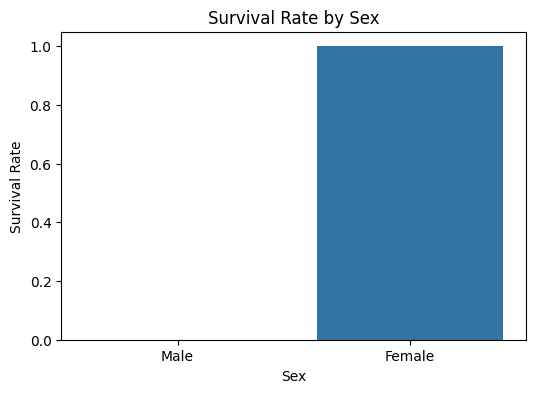

In [36]:
# Visualizing Key Relationships - Survival rate by Sex - Visually shows the higher survival rate for females.
print("\n Visualizing Key Relationships - By Sex")
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df_processed.replace({'Sex': {0: 'Female', 1: 'Male'}}))
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


 Visualizing Key Relationships - By PClass


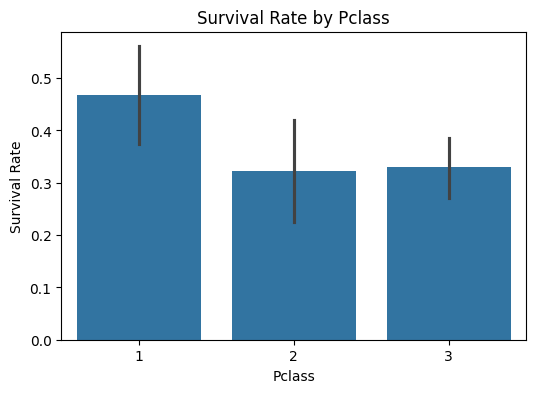

In [37]:
# Survival rate by Pclass - illustrates how survival rates vary across different passenger classes.
print("\n Visualizing Key Relationships - By PClass")
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df_processed)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.show()

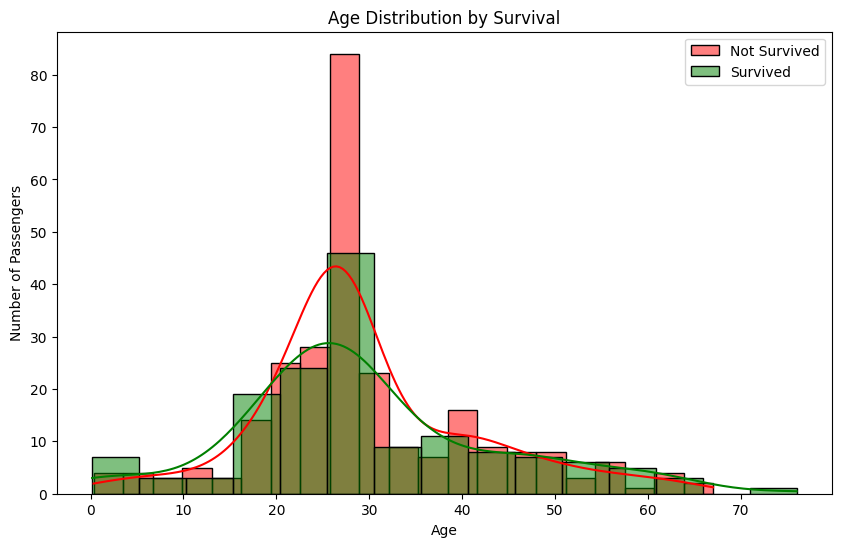

In [38]:
# Distribution of Age and its relation to Survival - The histogram compares the age distribution of survivors vs. non-survivors.
plt.figure(figsize=(10, 6))
sns.histplot(df_processed[df_processed['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True)
sns.histplot(df_processed[df_processed['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

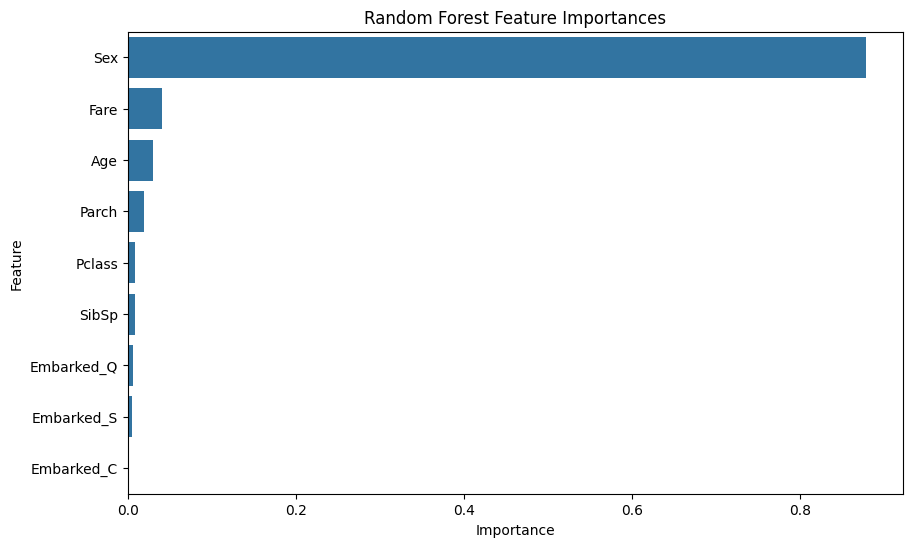

In [39]:
importances = rf_model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances.values, y=forest_importances.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()